**Dò kết quả 20 năm của xổ số kiến thiết và đưa ra dự đoán những cases dễ trúng cho anh em nào thích mua xổ số bằng bằng Python và ipynb**

*Import Files*

In [1]:
import pandas as p
import matplotlib.pyplot as plot
import seaborn as sb
import os

*Read Files*

In [21]:
csv_name = "KQXS_MB_tu_18-8-2012.csv"
path_to_csv:str = f'./CSVs/{csv_name}'
data_XSMB = p.read_csv(path_to_csv)
data_XSMB

,Results
0,959695.0
1,225485.0
2,720314.0
3,409072.0
4,314232.0
...,...
4048,84379.0
4049,26569.0
4050,50939.0
4051,34306.0


*Convert float to int in case if there are any float types on your table*

In [27]:
print(data_XSMB.dtypes)
data_XSMB = data_XSMB.fillna(0)
data_XSMB["Results"] = data_XSMB["Results"].astype(int)
print(data_XSMB.dtypes)

Results        float64
odd             object
last2digits     object
dtype: object
Results         int64
odd            object
last2digits    object
dtype: object


*Sort odd or even value*

In [29]:
data_XSMB["odd"] = data_XSMB["Results"].apply(lambda x: "YES" if x%2 == 0 else "NO")
data_XSMB

,Results,odd,last2digits
0,959695,NO,.0
1,225485,NO,.0
2,720314,YES,.0
3,409072,YES,.0
4,314232,YES,.0
...,...,...,...
4048,84379,NO,.0
4049,26569,NO,.0
4050,50939,NO,.0
4051,34306,YES,.0


*Count odd and even value*

In [31]:
data_XSMB['odd'].value_counts()

NO     2077
YES    1976
Name: odd, dtype: int64

In [24]:
data_XSMB_odd = data_XSMB.groupby('odd').count().reset_index()
data_XSMB_odd

,odd,Results
0,NO,2077
1,YES,1973


*Draw Graph*

<AxesSubplot:xlabel='odd', ylabel='Results'>

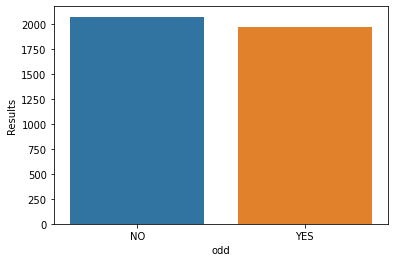

In [32]:
sb.barplot(data=data_XSMB_odd, x= 'odd', y= 'Results')

*Take last 2 digits*

In [33]:
data_XSMB['last2digits'] = data_XSMB['Results'].apply(lambda par : (str(par)[-2:]))
data_XSMB

,Results,odd,last2digits
0,959695,NO,95
1,225485,NO,85
2,720314,YES,14
3,409072,YES,72
4,314232,YES,32
...,...,...,...
4048,84379,NO,79
4049,26569,NO,69
4050,50939,NO,39
4051,34306,YES,06


*Count anđ draw graph of which last two digits have the highest amount*


In [34]:
data_XSMB['last2digits'].value_counts()

04    85
05    83
00    76
63    76
40    76
      ..
82     7
58     7
31     7
0      3
98     3
Name: last2digits, Length: 101, dtype: int64

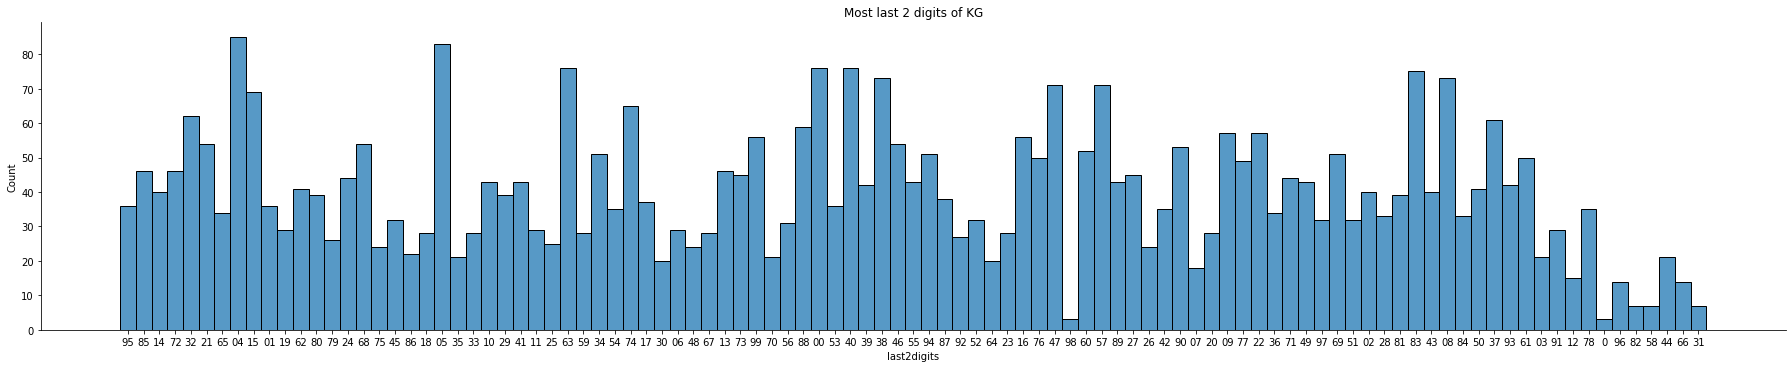

In [40]:
sb.displot(data_XSMB['last2digits'], bins=10, height=5, aspect=5).set(title=f"Most last 2 digits of {os.path.splitext(csv_name)[0].split('_')[1]}")
